# EDA & Data Cleaning

In [ ]:
### Importing all relevant libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in both training and testing data sets

In [2]:
df = pd.read_csv('../data/train.csv',index_col='Id')
test = pd.read_csv('../data/test.csv',index_col='Id')
print('Training Data shape:',df.shape,'Testing Data shape:',test.shape)

Training Data shape: (2051, 80) Testing Data shape: (879, 79)


# Exploratory Data Analysis

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,80.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0


In [5]:
df.sort_values(by="SalePrice").head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789
1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,34900
2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,ConLD,35000
2881,911175430,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,35311


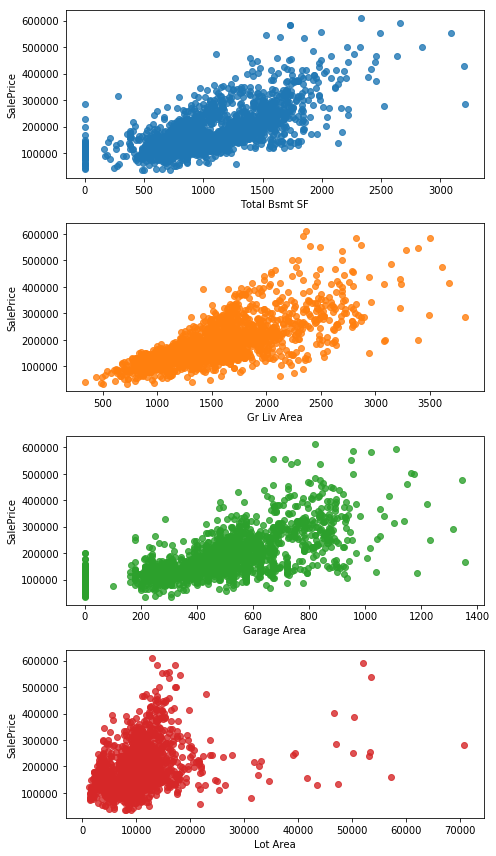

In [16]:
def scatter(df,target):
    data = df.select_dtypes(exclude="object")
    fig, ax = plt.subplots(ncols = 1, nrows = data.shape[1], figsize = (7,data.shape[1]*3))
    i = 0
    for col in data:
        sns.regplot(x = df[col],y = target,fit_reg=False, ax=ax[i])
        i += 1
        plt.tight_layout()
scatter(df[['Total Bsmt SF',"Gr Liv Area",'Garage Area','Lot Area']],df["SalePrice"])

# Data Cleaning

In [11]:
fill_na={'Lot Frontage':np.mean(df['Lot Frontage']),
         'Alley':'No Alley',
         'Mas Vnr Type':'No Vnr',
         'Mas Vnr Area':0,
         'Bsmt Qual':'No Bsmt',
         'Bsmt Cond':'No Bsmt',
         'Bsmt Exposure':'No Bsmt',
         'BsmtFin Type 1':'No Bsmt',
         'BsmtFin SF 1':0,
         'BsmtFin Type 2':'No Bsmt',
         'BsmtFin SF 2':0,
         'Bsmt Unf SF':0,
         'Total Bsmt SF':0,
         'Bsmt Full Bath':0,
         'Bsmt Half Bath':0,
         'Fireplace Qu':'No Fire',
         'Garage Type':'No Garage',
         'Garage Yr Blt':0,
         'Garage Qual':'No Garage',
         'Garage Cond':'No Garage',
         'Garage Finish':"No Garage",
         'Garage Cars':0,
         'Garage Area':0,
         'Pool QC':'No Pool',
         'Fence':'No Fence',
         'Misc Feature':'No Feature',
         'Electrical':'Mix'
        }

#### Additional Feature Engineering

In [12]:
df.fillna(value = fill_na,inplace = True)
test.fillna(fill_na,inplace=True)
df["Total Area"] = df["Total Bsmt SF"] + df["Gr Liv Area"] + df['Garage Area']
test['Total Area'] = test["Total Bsmt SF"] + test['Gr Liv Area'] + test["Garage Area"]

I believe that Total Area will be a better estimator of sale price than each individual part of total area. In real estate, most agents will utilize Total Area in their sale prediction to give an impression of higher value, instead of the area of each individual part of a house

In [13]:
print("There are",df.isnull().sum().sum(),"null values in our training data frame")
print("There are",test.isnull().sum().sum(),"null values in our testing data frame")

There are 0 null values in our training data frame
There are 0 null values in our testing data frame


#### dropping outliers/incorrect values

In [14]:
df.drop(df[df['Lot Area']>100000].index,inplace=True)
df.drop(df[df['Garage Yr Blt']>2018].index,inplace=True)
df.drop(df[df['Total Area']>10000].index,inplace=True)
df.drop(df[df['SalePrice']<20000].index,inplace = True)

Looking at our scatter plots, we can see that there are either a very few distinct outliers in all of these features, or values that do not make any sense, so these rows are dropped to ensure they do not affect our model negatively 

In [ ]:
df.to_csv("../data/clean_data")
test.to_csv("../data/clean_test_data")